In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

base_dir = Path.cwd() / 'output'

     idx         label  predict_result
587    0  1.630399e+08    7.347038e+07
300    1  7.839926e+07    7.347038e+07
0      2  1.043471e+07    4.217510e+07
891    3  1.138426e+07    7.483904e+07
1      4  1.224122e+07    3.250801e+07
(100, 1)
(400, 2)


,label,predict_result
0,1.226707e+08,1.318685e+08
1,9.593686e+07,1.375285e+08
2,2.768040e+05,2.555445e+06
3,2.681788e+06,6.204539e+06
4,3.519520e+05,2.242347e+06
...,...,...
395,3.581760e+06,1.223728e+07
396,7.151801e+06,2.289534e+07
397,1.078732e+07,1.117971e+07
398,1.335019e+06,4.418278e+06


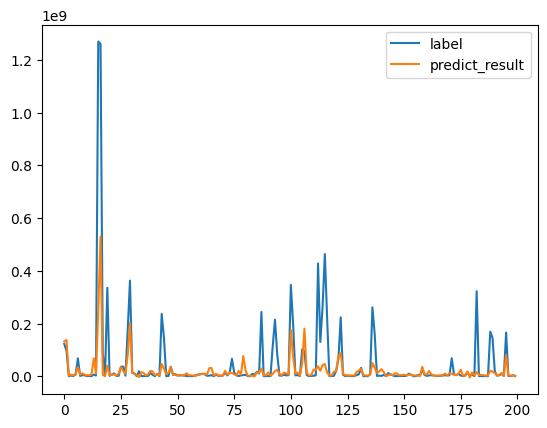

In [3]:



predict_data = pd.read_csv(
    base_dir / 'result.csv').sort_values('idx')[['idx', 'label', 'predict_result']]
print(predict_data.head())
templ_df = pd.read_csv(base_dir / 'ID_date_templ_test.csv')
templ_df['result'] = predict_data['predict_result']
templ_df = templ_df.groupby('ID').tail(3)[['ID', 'result']].groupby('ID').sum()
print(templ_df.shape)
templ_df.to_csv('output/submit.csv')

# predict_data.head(10)

predict_data_season = predict_data.groupby(predict_data.index // 3)[['label', 'predict_result']].sum()

predict_data_season[:200].plot()
# plt.plot(predict_data['idx'], predict_data[['label', 'predict_result']])
print(predict_data_season.shape)
predict_data_season

(1200, 3)
        ID        result
0  2022004  3.387667e+07
1  2022007  8.828743e+05
2  2022014  1.150738e+07
3  2022015  8.372930e+05
4  2022017  6.989983e+05
(1100, 3)


,idx,label,predict_result
300,1,7.839926e+07,7.347038e+07
0,2,1.043471e+07,4.217510e+07
891,3,1.138426e+07,7.483904e+07
1,4,1.224122e+07,3.250801e+07
301,5,1.798138e+08,2.881277e+07
...,...,...,...
1197,1193,3.035117e+05,1.101102e+05
1198,1194,9.308867e+05,3.282891e+06
585,1195,1.410620e+06,3.352538e+06
586,1196,1.305347e+06,3.066870e+06


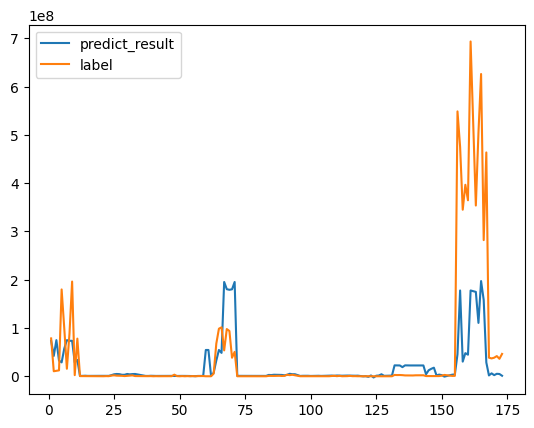

In [14]:
# 季度数据处理
predict_data = pd.read_csv(base_dir / 'result.csv').sort_values('idx')[[
    'idx', 'label', 'predict_result'
]]
predict_data.to_csv('output/result_sort.csv')
print(predict_data.shape)

templ_df = pd.read_csv(base_dir / 'ID_date_templ_test.csv')

submit_df = pd.DataFrame(templ_df['ID'].unique(),
                         columns=['ID']).sort_values('ID')
# templ_df['result'] = predict_data['label']
submit_df['result'] = predict_data.iloc[
    11::12, :].reset_index()['predict_result']
# submit_df = templ_df.reset_index(drop=True)
print(submit_df.head())
submit_df.to_csv('output/submit.csv', index=False, header=False)

last_season_index = [i for i in range(100*12)][11::12]
# print(predict_data.iloc[last_season_index, :].reset_index()['predict_result'].head())
# print(predict_data.iloc[11::12, :]['predict_result'])
# # templ_df = templ_df.groupby('ID').tail(3)[['ID', 'result']].groupby('ID').sum()
# print('1111', templ_df.shape)

# predict_data.head(10)
# predict_data.to_csv('output/pp.csv')

# print(last_season_index)
# predict_data_season = predict_data
predict_data_season = predict_data.drop(axis=0,
                                        index=last_season_index,
                                        inplace=False)

# 如果取没12行的前11行
# predict_data_season[:10].plot()
line = plt.plot(predict_data_season[0:160]['idx'],
         predict_data_season[0:160][['predict_result', 'label']]) # 黄色是label，蓝色是predict
plt.legend(iter(line), ['predict_result', 'label'])
print(predict_data_season.shape)
predict_data_season

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

print(f"均方误差(MSE)：{mean_squared_error(predict_data_season['label'], predict_data_season['predict_result'])}")
print(f"根均方误差(RMSE)：{np.sqrt(mean_squared_error(predict_data_season['label'], predict_data_season['predict_result']))}")
print(
    f"测试集R^2：{r2_score(predict_data_season['label'], predict_data_season['predict_result'])}"
)


均方误差(MSE)：2798515807010037.0
根均方误差(RMSE)：52901000.05680457
测试集R^2：0.27761677634836457


In [ ]:
gover_df = pd.read_csv(base_dir / 'gover_data_train_3.csv')
print(gover_df.columns)

y_data = [
    'sjje_per_month', 'month_amount', 'year_amount', 'season'
]
lineObjects = plt.plot(gover_df[24:48]['idx'], gover_df[24:48][y_data])  # 黄色是label，蓝色是 sjje_per_month

# lineObjects = plt.plot(x, y)
plt.yscale('log')
plt.legend(iter(lineObjects), y_data)


# gover_df.loc[(gover_df['season'] == 4) & (gover_df['year'].isin([2021, 2020])),'sjje_per_month'] = 4
# gover_df
# plt.plot(gover_df[:72]['idx'], gover_df[:72]['sjje_per_month'])  # 黄色是label，蓝色是 sjje_per_month

# plt.legend()
